# Importing the necessary packages and data


In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
main_df=pd.read_pickle('Data/df_of_imdb_data.pkl')

y=main_df['is_nominee'].copy()

# Making the train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(main_df.copy(), y,
                                                       shuffle=True,
                                                       random_state=126029,
                                                       test_size=.2,
                                                       stratify=y
                                                   )

# Parsing the certificates info

We see here that there are over 1,000 types of certificates.  I spent some time trying to parse them with a mixture of Google and good sense, but then I decided that just focusing on US ratings would make more sense.

This first section is a mess.  I suggest skipping down to the next section if you are reading this without the intent to work on it.

In [24]:
main_df['certificates'].explode().value_counts()

Japan:G                                    733
South Korea:All                            731
Singapore:PG                               532
Italy:T                                    515
France:Tous publics                        504
                                          ... 
Brazil:18::(iTunes)                          1
Russia:16+::(TV rating, edited)              1
United Kingdom:18::(recommended rating)      1
United States:Unrated::(YouTube)             1
Turkey:16+                                   1
Name: certificates, Length: 1356, dtype: int64

In [75]:
ratings=['pending' for i in range(3901)]

In [76]:
#If not available, rating 'not available'
for i in range(len(main_df)):
    if main_df.iloc[i]['certificates']==[]:
        ratings[i] = 'not available'

In [236]:
#Ratings roughly equivalent to G, rated as PG for international consistency:
for i in range(len(main_df)):
    if ratings[i] == 'pending':
        for rating in main_df.iloc[i]['certificates']:
            if 'United States:G' in rating:
                ratings[i] = 'PG'
            if 'United States:TV-G' in rating:
                ratings[i]='PG'
            elif 'Japan:G' in rating:
                ratings[i] ='PG'
            elif 'Japan:All Ages' in rating:
                ratings[i]='PG'
            elif 'Hong Kong:I' in rating:
                ratings[i]='PG'
            elif 'Finland:S' in rating:
                ratings[i]='PG'
            elif 'Spain:A' in rating:
                ratings[i]='PG'
            elif 'Italy:T' in rating:
                ratings[i]='PG'
            elif 'Malaysia:U' in rating:
                ratings[i] = 'PG'
            elif 'South Korea:All' in rating:
                ratings[i]='PG'
            elif 'Argentina:Atp' in rating:
                ratings[i]='PG'
            elif 'Canada:G' in rating:
                ratings[i]='PG'
            elif 'Germany:0' in rating:
                ratings[i]='PG'
            elif 'Australia:G' in rating:
                ratings[i]='PG'
            elif 'Russia:0+' in rating:
                ratings[i] ='PG'
            elif 'United Kingdom:U' in rating:
                ratings[i]='PG'
            elif 'Philippines:G' in rating:
                ratings[i] = 'PG'
            elif 'Brazil:Livre' in rating:
                ratings[i]='PG'
            elif 'Mexico:A' in rating:
                ratings[i]='PG'
            elif 'Singapore:G' in rating:
                ratings[i] = 'PG'
            elif 'Czechia:U' in rating:
                ratings[i]='PG'
            elif 'Denmark:A' in rating:
                ratings[i] = 'PG'
            elif 'India:U' in rating:
                ratings[i] = 'PG'
            elif 'Switzerland:0' in rating:
                ratings[i] = 'PG'
            elif 'Chile:TE' in rating:
                ratings[i] = 'PG'

In [206]:
#Roughly equivalent to PG
for i in range(len(main_df)):
    if ratings[i] == 'pending':
        for rating in main_df.iloc[i]['certificates']:
            if 'United States:PG' in rating:
                ratings[i] = 'PG'
            elif 'United States:TV-Y' in rating:
                ratings[i]='PG'
            elif 'United States:TV-PG' in rating:
                ratings[i]='PG'
            elif 'France:Tous publics' in rating:
                ratings[i] ='PG'
            elif 'United Kingdom:PG' in rating:
                ratings[i]='PG'
            elif 'Germany:6' in rating:
                ratings[i]='PG'
            elif 'Australia:PG' in rating:
                ratings[i]='PG'
            elif 'Singapore:PG' in rating:
                ratings[i]='PG'

In [257]:
#Roughly equivalent to PG-13:
for i in range(len(main_df)):
    if ratings[i] == 'pending':
        for rating in main_df.iloc[i]['certificates']:
            if 'United States:PG-13' in rating:
                ratings[i] = 'PG-13'
            elif 'United States:TV-14' in rating:
                ratings[i]='PG-13'
            elif 'Japan:PG-12' in rating:
                ratings[i] ='PG-13'
            elif 'Singapore:PG13' in rating:
                ratings[i]='PG-13'
            elif 'Germany:12' in rating:
                ratings[i]='PG-13'
            elif 'Spain:13' in rating:
                ratings[i] = 'PG-13'
            elif 'Finland:K-11' in rating:
                ratings[i]='PG-13'
            elif 'Argentina:13' in rating:
                ratings[i] = 'PG-13'
            elif 'South Korea:12' in rating:
                ratings[i] = 'PG-13'
            elif 'United Kingdom:12' in rating:
                ratings[i]='PG-13'
            elif 'United Kingdom:13' in rating:
                ratings[i] = 'PG-13'
            elif 'Philippines:PG-13' in rating:
                ratings[i] = 'PG-13'
            elif 'Japan:PG12' in rating:
                ratings[i] = 'PG-13'
            elif 'Brazil:12' in rating:
                ratings[i] = 'PG-13'
            elif 'Brazil:10' in rating:
                ratings[i] = 'PG-13'
            elif 'Brazil:14' in rating:
                ratings[i] = 'PG-13'

In [247]:
#Roughly equivalent to R
for i in range(len(main_df)):
    if ratings[i] == 'pending':
        for rating in main_df.iloc[i]['certificates']:
            if 'United States:R' in rating:
                ratings[i] = 'R'
            if 'United States:TV-MA' in rating:
                ratings[i]='R'
            elif 'United Kingdom:15' in rating:
                ratings[i]='R'
            elif 'Australia:M' in rating:
                ratings[i]='R'
            elif 'Singapore:NC-16' in rating:
                ratings[i]='R'
            elif 'Singapore:M18' in rating:
                ratings[i]='R'
            elif 'Japan:R-15' in rating:
                ratings[i] ='R'
            elif 'United States:M' in rating:
                ratings[i]='R'
            elif 'Brazil:16' in rating:
                ratings[i] = 'R'


In [125]:
#If rated United States:NC-17 , rating is NC-17
for i in range(len(main_df)):
    if ratings[i] == 'pending':
        for rating in main_df.iloc[i]['certificates']:
            if 'United States:NC-17' in rating:
                ratings[i] = 'NC-17'
            elif 'United Kingdom:18' in rating:
                ratings[i] = 'NC-17'

In [240]:
#If no rating at all, not available
for i in range(len(main_df)):
    if ratings[i]=='pending':
        if main_df.iloc[i]['certificates']==['United States:Unrated']:
            ratings[i] = 'not available'
        if main_df.iloc[i]['certificates'] ==['United States:Not Rated']:
            ratings[i]='not available'
        elif main_df.iloc[i]['certificates'] ==['Germany:Not Rated']:
            ratings[i] = 'not available'

In [259]:
for i in range(0,2000):
    if ratings[i] =='pending':
        print(main_df.iloc[i]['certificates'])

['Finland:K-3']
['Switzerland:7::(canton of Geneva)', 'Switzerland:7::(canton of Vaud)']
['Finland:K-7', 'Portugal:M/4', 'Switzerland:7::(canton of Geneva)', 'Switzerland:7::(canton of Vaud)']
['Netherlands:AL']
['Norway:A::(TV rating)', 'Sweden:Btl']
['Netherlands:AL']
['South Korea:15']
['Netherlands:6']
['Finland:K-7', 'Finland:K-3']
['Portugal:M/12']
['Belgium:KT/EA']
['Portugal:M/4']
['Hungary:12']
['Canada:14A::(TV rating)', 'South Korea:15', 'United States:Not Rated']
['Norway:7::(cinema rating)', 'Poland:13::(self-applied)']
['Russia:16+']
['Denmark:7', 'Norway:7::(recommended rating)', 'Sweden:Btl']
['Russia:6+']
['Finland:K-7', 'Norway:7::(DVD rating)']
['Japan:A']
['Finland:K-7', 'Netherlands:AL', 'Sweden:7']
['Portugal:M/4']
['Canada:18A::(Ontario)', 'France:12', 'Portugal:M/16']
['Singapore:R21']
['Denmark:16', 'Poland:16']
['South Korea:15']
['France:16']
['Denmark:15', 'United States:Not Rated']
['Italy:VM18::(dvd rating)']
['Finland:K-3']
['Turkey:G']
['Nigeria:G::(self

In [21]:
L=[]
for i in range(len(main_df['certificates'])):
    for j in main_df['certificates'][i]:
        if len(j)>13:
            if j[0:13] =='United States':
                if j not in L:
                    L.append(j)
L

['United States:TV-PG',
 'United States:R',
 'United States:Unrated',
 'United States:G',
 'United States:PG-13',
 'United States:TV-PG::(DL, TV rating.)',
 'United States:TV-PG::(DLV)',
 'United States:TV-PG::(TV Rating)',
 'United States:PG',
 'United States:Not Rated',
 'United States:TV-14::(TV rating)',
 'United States:TV-PG::(cable rating)',
 'United States:TV-Y',
 'United States:TV-G',
 'United States:TV-PG::(ABC)',
 'United States:TV-G::(Disney Channel)',
 'United States:TV-Y7',
 'United States:G::(No. 38494)',
 'United States:TV-PG::(ABC Family)',
 'United States:PG::(Approved No. 38658)',
 'United States:TV-Y7::(Disney Channel)',
 'United States:TV-G::(Fox Movie Channel)',
 'United States:G::(No. 38853)',
 'United States:TV-PG::(Disney)',
 'United States:TV-G::(FreeForm)',
 'United States:PG::(No. 38107)',
 'United States:PG::(No. 39338)',
 'United States:PG::(No. 39135)',
 'United States:TV-G::(DVD rating)',
 'United States:TV-PG::(TV rating)',
 'United States:TV-MA',
 'Unit

In [40]:
J=[]
for i in range(len(main_df['certificates'])):
    for j in main_df['certificates'][i]:
        if len(j)>5:
            if j[0:5] =='Japan':
                if j not in J:
                    J.append(j)
J

['Japan:G',
 'Japan:PG-12',
 'Japan:G::(Amazon Video Rating)',
 'Japan:All Ages',
 'Japan:G::(self-applied)',
 'Japan:G::(new rating)',
 'Japan:R-15',
 'Japan:R-18',
 'Japan:Unrated',
 'Japan:G::(MTRCB)',
 'Japan:(Banned)',
 'Japan:R18+',
 'Japan:PG12',
 'Japan:R15+',
 'Japan:A',
 'Japan:G::(General Audience)',
 'Japan:Z',
 'Japan:C',
 'Japan:15',
 'Japan:PG12::(self-applied)',
 'Japan:G::(theatrical rating)',
 'Japan:R18+::(self-applied)']

# US Ratings Only

In [333]:
#We create a list of ratings for the movies, using G, PG, PG-13, R to classify them (rough equivalents to TV ratings)
def process_ratings(df):
    '''inputs a dataframe (df) of movies
    outputs a list of the US ratings'''
    ratings = ['pending' for i in range(len(df))]

    for i in range(len(df)):
        #if ratings[i] == 'pending':
            for rating in df.iloc[i]['certificates']:
                if 'United States' ==rating[0:13]:
                    #print(rating)
                    if 'United States:G' in rating:
                        ratings[i] = 'G'
                    elif 'United States:TV-G' in rating:
                        ratings[i] = 'G'
                    elif 'United States:TV-Y' in rating:
                        ratings[i]='PG'
                    elif 'United States:PG-13' in rating:
                        ratings[i]='PG-13'
                    elif 'United States:PG' in rating:
                        ratings[i]='PG' #ORDER HERE IS IMPORTANT!
                        #print('this is normal')
                    elif 'United States:TV-PG' in rating:
                        ratings[i] = 'PG'
                    elif 'United States:TV-14' in rating:
                        ratings[i] = 'PG-13'
                    elif 'United States:R' in rating:
                        ratings[i] = 'R'
                    elif 'United States:TV-MA' in rating:
                        ratings[i]='R'
                    elif 'United States:M' in rating:
                        ratings[i]='R'
                        #print('uh oh!')
                    elif 'United States:NC-17' in rating:
                        ratings[i] = 'R'
    for i in range(len(df)):
        if ratings[i] =='pending':
            ratings[i] ='Unrated'
    return ratings

In [334]:
ratings=process_ratings(X_train)

In [335]:
ratings[0:10]

['Unrated',
 'G',
 'Unrated',
 'Unrated',
 'Unrated',
 'G',
 'Unrated',
 'Unrated',
 'Unrated',
 'G']

In [337]:
#Assigning numbers to the rankings:
#0 is unprovided, then in order of age-appropriateness
rating_rank = []
for i in range(len(ratings)):
    if ratings[i] == 'G':
        rating_rank.append(1)
    elif ratings[i] == 'PG':
        rating_rank.append(2)
    elif ratings[i] == 'PG-13':
        rating_rank.append(3)
    elif ratings[i] == 'R':
        rating_rank.append(4)
    elif ratings[i] == 'Unrated':
        rating_rank.append(0)
    else:
        print("You missed one!")
        print(ratings[i])

In [338]:
len(ratings)

3120

In [341]:
nominee_ratings= pd.DataFrame({'imdb_id': [],
                    'rating': []})
for i in range(len(ratings)):
    if X_train.iloc[i]['is_nominee'] ==1:
        nominee_ratings.loc[len(nominee_ratings.index)] = [X_train.iloc[i]['imdb_id'], ratings[i]]
        
nominee_ratings['rating'].value_counts()    

PG         49
G          12
PG-13       7
R           2
Unrated     1
Name: rating, dtype: int64

In [343]:
ratings.count('PG')

467

# Visualizing the data

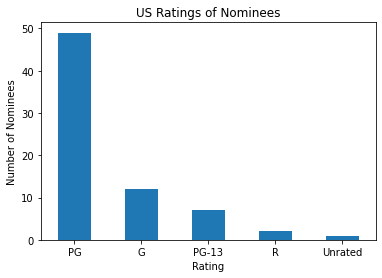

In [346]:
#What ratings are the nominated movies?
toplot=nominee_ratings['rating'].value_counts()

ax=toplot.plot.bar(xlabel='Rating', ylabel='Number of Nominees', rot=0,
                    title='US Ratings of Nominees')

In [352]:
nominee_ratings['rating'].value_counts()[3]

2

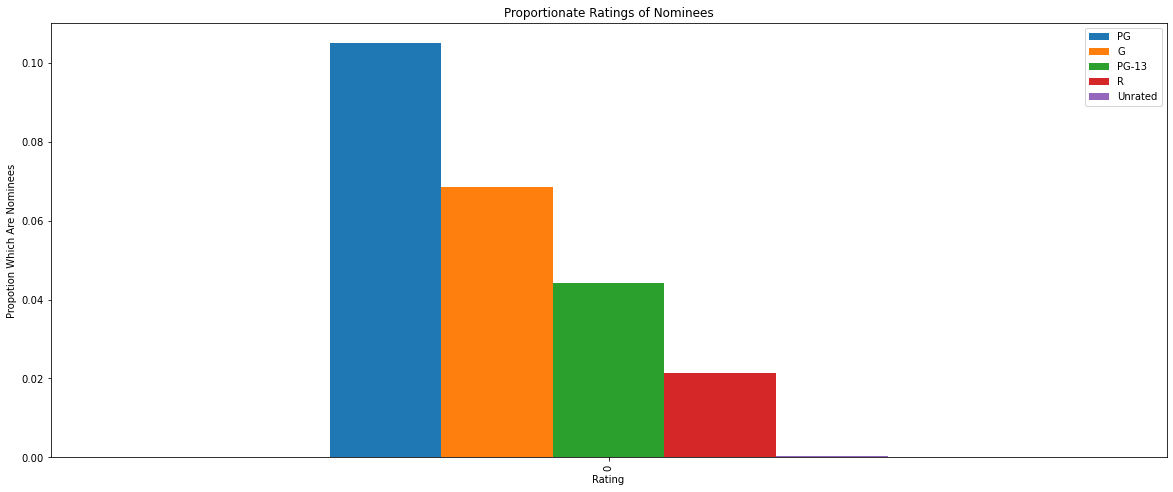

In [358]:
#What proportion of all movies of a given rating are nominees?
toplot=pd.DataFrame({'PG':[nominee_ratings['rating'].value_counts()[0]/ratings.count('PG')],
        'G':[nominee_ratings['rating'].value_counts()[1]/ratings.count('G')],
        'PG-13':[nominee_ratings['rating'].value_counts()[2]/ratings.count('PG-13')],
        'R':[nominee_ratings['rating'].value_counts()[3]/ratings.count('R')],
        'Unrated':[nominee_ratings['rating'].value_counts()[4]/ratings.count('Unrated')]
        })

ax=toplot.plot.bar(xlabel='Rating', ylabel='Propotion Which Are Nominees', figsize=(20,8),
                    title='Proportionate Ratings of Nominees')